# Transfer Learning. Семинар 1

## Модель transformers

### Установка модели transformers

In [ ]:
# !pip install transformers

### Почему трансформеры?

- Не простые эмбеддинги, а позиционные (часть слова + положение в последовательности)
- 10-20 одинаковых модулей, которые постоянно рассылают друг другу "запросы"
- Каждый модуль практически равен строчке кода в программе (хотя может делать гораздо более сложные вещи)
- Очень эффективно вычисляется и распараллеливается

В предшествующих (реккурентных) сетях обучение и вычисление велось по цепочке. Тут все параллельно.

* GPT3 учитывал 8000.
* GPT4 учитывает 32000 токенов в качестве контекста (объем маленькой книги).
* Flash attention – 64000 (среднего размера книга)

Трансформеры требуют огромного количества памяти.

* _Stable Diffusion_ – модели от 10 Гб и больше
* _GPT_... давайте посмотрим на сайте

## Huggingface

* Сотни тысяч предобученных моделей
* Очень много датасетов (как и в kaggle, и в Google Dataset Search)
* HF Spaces

https://huggingface.co/

Модель можно загрузить и использовать локально, или пользоваться её API.

### Pipeline

Объекты Pipeline: https://huggingface.co/docs/transformers/v4.35.2/en/main_classes/pipelines

## Задачи компьютерного зрения

* Оценка карты глубины по фотографии: https://huggingface.co/blog/cv_state#support-for-pipelines
* Классификация изображений
* Сегментация изображений
* Перевод изображения в изображение
* Детекция объектов
* Классификация видео
* Классификация без заранее определенных меток (ZeroShot Classification)

Перечень задач: https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#computer-vision

Загрузка изображения для обработки:

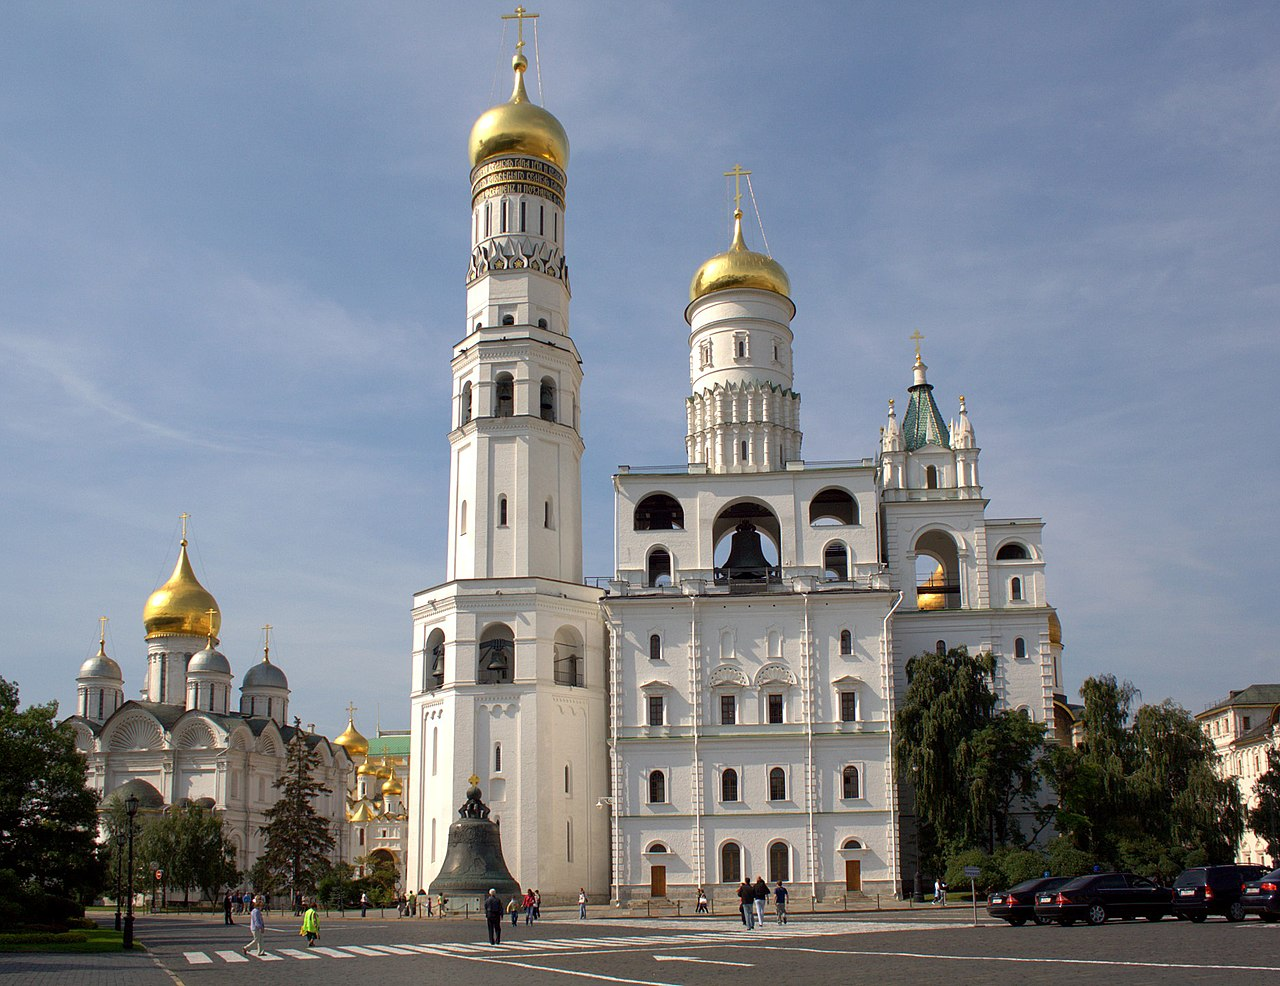

In [1]:
# !wget https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0._%D0%9A%D1%80%D0%B5%D0%BC%D0%BB%D1%8C._%D0%9A%D0%BE%D0%BB%D0%BE%D0%BA%D0%BE%D0%BB%D1%8C%D0%BD%D1%8F_%D0%98%D0%B2%D0%B0%D0%BD%D0%B0_%D0%92%D0%B5%D0%BB%D0%B8%D0%BA%D0%BE%D0%B3%D0%BE_IMG_2111.2_e1b2sm_VIII-2009.jpg/1280px-%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0._%D0%9A%D1%80%D0%B5%D0%BC%D0%BB%D1%8C._%D0%9A%D0%BE%D0%BB%D0%BE%D0%BA%D0%BE%D0%BB%D1%8C%D0%BD%D1%8F_%D0%98%D0%B2%D0%B0%D0%BD%D0%B0_%D0%92%D0%B5%D0%BB%D0%B8%D0%BA%D0%BE%D0%B3%D0%BE_IMG_2111.2_e1b2sm_VIII-2009.jpg

--2024-06-20 09:45:55--  https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0._%D0%9A%D1%80%D0%B5%D0%BC%D0%BB%D1%8C._%D0%9A%D0%BE%D0%BB%D0%BE%D0%BA%D0%BE%D0%BB%D1%8C%D0%BD%D1%8F_%D0%98%D0%B2%D0%B0%D0%BD%D0%B0_%D0%92%D0%B5%D0%BB%D0%B8%D0%BA%D0%BE%D0%B3%D0%BE_IMG_2111.2_e1b2sm_VIII-2009.jpg/1280px-%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0._%D0%9A%D1%80%D0%B5%D0%BC%D0%BB%D1%8C._%D0%9A%D0%BE%D0%BB%D0%BE%D0%BA%D0%BE%D0%BB%D1%8C%D0%BD%D1%8F_%D0%98%D0%B2%D0%B0%D0%BD%D0%B0_%D0%92%D0%B5%D0%BB%D0%B8%D0%BA%D0%BE%D0%B3%D0%BE_IMG_2111.2_e1b2sm_VIII-2009.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263048 (257K) [image/jpeg]
Saving to: ‘1280px-Москва._Кремль._Колокольня_Ивана_Великого_IMG_2111.2_e1b2sm_VIII-2009.jpg’

1280px-Москва._Крем 100%[===================>] 25

No model was supplied, defaulted to Intel/dpt-large and revision e93beec (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


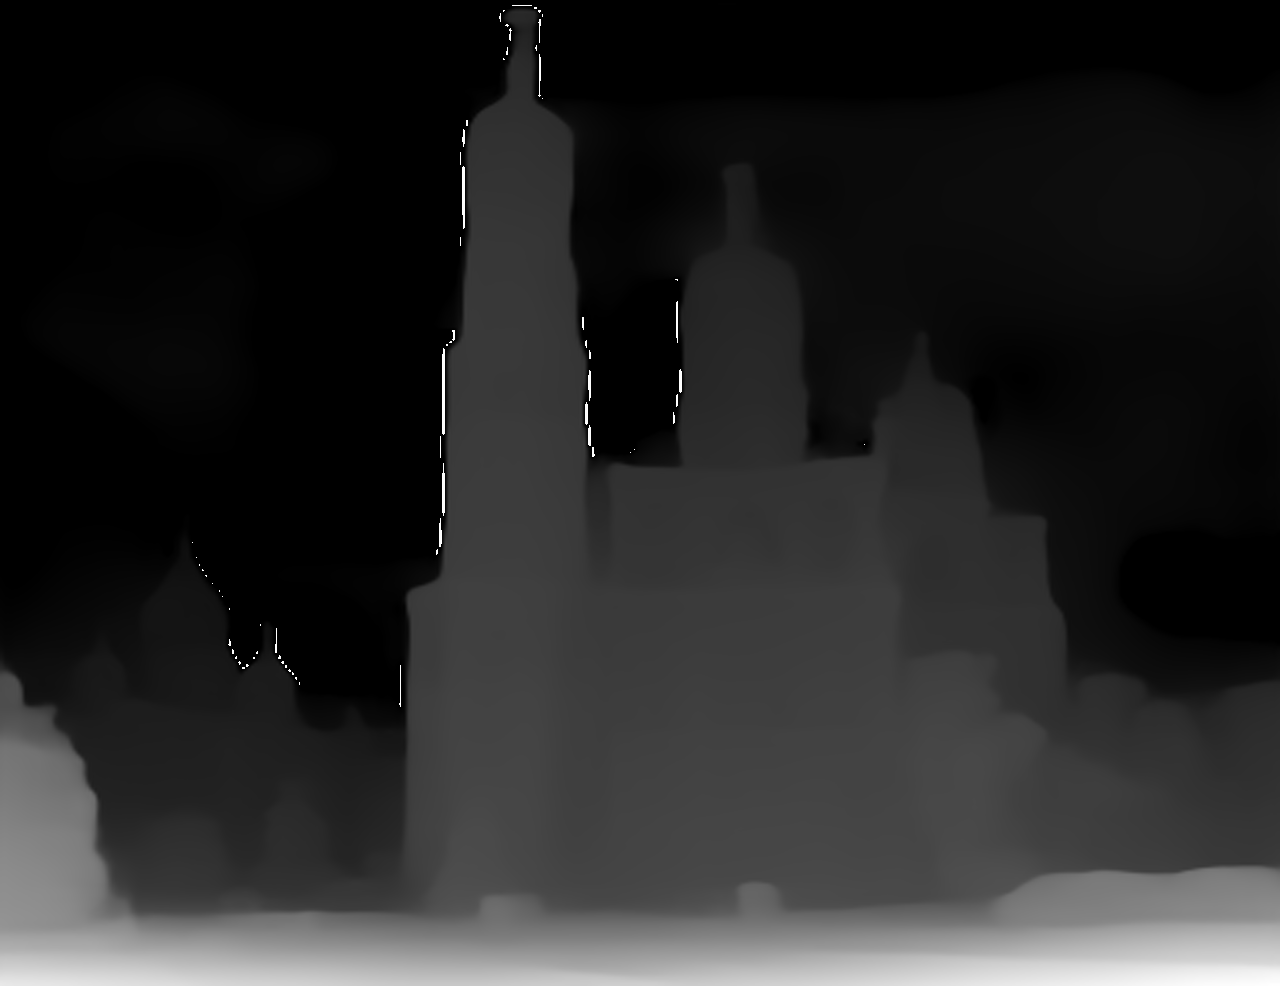

In [2]:
from transformers import pipeline

depth_estimator = pipeline(task="depth-estimation") # model="Intel/dpt-large"
# output = depth_estimator("image.jpg")
output = depth_estimator("./data/image.jpg")

# Вызов этой команды возвращает нам тензор, в котором дана оценочная информация
# об удаленности каждого объекта от зрителя (в метрах)
output["depth"]

### Генерация изображений

In [4]:
!pip install diffusers

from diffusers import DiffusionPipeline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

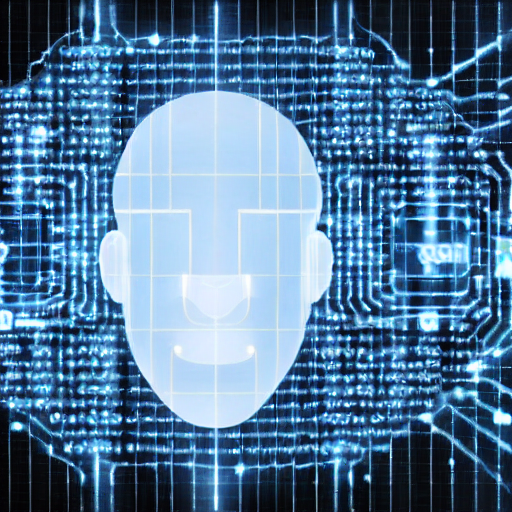

In [5]:
generator = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
generator.to("cuda")
# image = generator("An image of a squirrel in Picasso style").images[0]
image = generator("image of what artificial intelligence looks like").images[0]
image

## Работа с текстом

### Модель: вопрос-ответ

Модели, понимающий русский язык: https://huggingface.co/models?language=ru

Например, поищем русские модели для перевода текста в речь: https://huggingface.co/docs/transformers/tasks/text-to-speech

In [13]:
from transformers import pipeline

question_answerer = pipeline(
    "question-answering",
    model="Den4ikAI/rubert-large-squad",
    tokenizer="Den4ikAI/rubert-large-squad"
)

In [14]:
context = """
Во́льфганг Амаде́й Мо́царт (нем. Wolfgang Amadeus Mozart, МФА МФА: [ˈvɔlfɡaŋ amaˈdeus ˈmoːtsaʁt](инф.); полное имя — Иога́нн Хризосто́м Во́льфганг Амаде́й Мо́царт; 27 января 1756, Зальцбург — 5 декабря 1791, Вена) — австрийский композитор и музыкант-виртуоз. Один из самых популярных классических композиторов, Моцарт оказал большое влияние на мировую музыкальную культуру.
По свидетельству современников, Моцарт обладал феноменальным музыкальным слухом, памятью и способностью к импровизации. Самый молодой член[К 1] Болонской филармонической академии (с 1770 года) за всю её историю, а также самый молодой кавалер ордена Золотой шпоры (1770)."""

In [15]:
result = question_answerer(question="Моцарт был кавалером какого ордена?", context=context)
# print( result['answer'] )

In [16]:
result

{'score': 0.5918428897857666,
 'start': 624,
 'end': 637,
 'answer': 'Золотой шпоры'}

In [17]:
result = question_answerer(question="Кем был Моцарт?", context=context)
print( result['answer'] )

австрийский композитор и музыкант-виртуоз


### Модель: классификация эмоциональной окрашенности

Реализуйте классификацию эмоциональной окрашенности текстов при помощи объекта pipeline.

1. Найдите тип задач Sentiment Analysis на huggingface.co
2. Найдите модель для русского языка (примеры: rubert-tiny2..., rubert-base...)

In [7]:
from transformers import pipeline

classifier = pipeline(model="seara/rubert-tiny2-russian-sentiment")
# model("Привет, ты мне нравишься!")
# [{'label': 'positive', 'score': 0.9398769736289978}]


config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Выполните следующую ячейку. Если вы правильно инициализировали `pipeline`, вы получите относительно верные предсказания.

In [8]:
classifier( ["Отличный товар",
            "Мне не понравилось",
            "Прекрасно выглядит, ничего не меняйте!",
            "Ничего не понял",
            "У меня не работала розетка, в остальном все отлично"] )

[{'label': 'positive', 'score': 0.9941100478172302},
 {'label': 'neutral', 'score': 0.5911951661109924},
 {'label': 'positive', 'score': 0.9389204382896423},
 {'label': 'negative', 'score': 0.5240057706832886},
 {'label': 'positive', 'score': 0.6734205484390259}]

## Сервис на основе модели

Например, в Gradio:

1. https://huggingface.co/spaces/gradio/chatbot
2. https://www.kdnuggets.com/2023/06/build-ai-chatbot-5-minutes-hugging-face-gradio.html

Или в Huggingface Spaces: https://huggingface.co/spaces

### Модель: заполнение пропущенных слов

In [9]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="huggingface/CodeBERTa-small-v1",
    tokenizer="huggingface/CodeBERTa-small-v1"
)

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/336M [00:00<?, ?B/s]

Some weights of the model checkpoint at huggingface/CodeBERTa-small-v1 were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/994k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/483k [00:00<?, ?B/s]

In [11]:
python_code = """
# a list of numbers
my_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]
my_numbers.<mask>
"""

In [12]:
fill_mask( python_code )

[{'score': 0.49270951747894287,
  'token': 1942,
  'token_str': 'sort',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.sort\n'},
 {'score': 0.06356006115674973,
  'token': 3059,
  'token_str': 'clear',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.clear\n'},
 {'score': 0.05641983449459076,
  'token': 5648,
  'token_str': 'reverse',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.reverse\n'},
 {'score': 0.043078433722257614,
  'token': 808,
  'token_str': 'length',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.length\n'},
 {'score': 0.01888856664299965,
  'token': 914,
  'token_str': 'size',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.size\n'}]